In [1]:
import pandas as pd
import numpy as np

# from sklearn.datasets import load_boston, load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

##### To predict car price by using various features

### 2. Data Collection

In [2]:
df=pd.read_csv('autos_dataset.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'  ====> all are above independent variable or predictor variable

'price' ===> dependent veriable

### 3. EDA and Feature Engg

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.select_dtypes(exclude=object)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [6]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [7]:
df.replace('?',np.nan,inplace=True)

In [8]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median())

In [10]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [11]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [12]:
df['num-of-doors'].replace({np.nan:'four'},inplace=True)

In [13]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [14]:
df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [15]:
df['bore']=df['bore'].astype(float)
df['bore']=df['bore'].fillna(df['bore'].median())

In [16]:
df['stroke']

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [17]:
df['stroke']=df['stroke'].astype(float)
df['stroke']=df['stroke'].fillna(df['stroke'].median())

In [18]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [19]:
df['horsepower']=df['horsepower'].astype(float)
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [20]:
df['peak-rpm']=df['peak-rpm'].astype(float)
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median())

In [21]:
df['price']=df['price'].astype(float)
df['price']=df['price'].fillna(df['price'].median())

In [22]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
df['fuel-type'].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [24]:
df['fuel-type'].replace({'gas':1,'diesel':0},inplace=True)

In [25]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [26]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [27]:
df['aspiration'].replace({'std': 0, 'turbo': 1},inplace=True)

In [31]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [32]:
df['num-of-doors'].value_counts()  # need to be drop

num-of-doors
four    116
two      89
Name: count, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [33]:
df['num-of-doors'].mode()[0]

'four'

In [34]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace=True)

In [35]:
df['num-of-doors'].isna().sum()

0

In [36]:
df['num-of-doors'].replace({'two':2,'four':4},inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [38]:
df['body-style'].value_counts()

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [40]:
df['body-style'].value_counts().to_dict()

{'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6}

In [41]:
df['body-style'].replace({'sedan': 4, 'hatchback': 3, 'wagon': 2, 'hardtop': 1, 'convertible': 0},inplace=True)

In [43]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [44]:
df['drive-wheels'].replace({'fwd': 2, 'rwd': 1, '4wd': 0},inplace=True)

In [46]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [47]:
df['engine-location'].replace({'front': 1, 'rear': 0},inplace=True)

In [49]:
df['engine-type'].value_counts().to_dict()

{'ohc': 148,
 'ohcf': 15,
 'ohcv': 13,
 'dohc': 12,
 'l': 12,
 'rotor': 4,
 'dohcv': 1}

In [50]:
df['engine-type'].replace({'ohc': 6,
 'ohcf': 5,
 'ohcv': 4,
 'dohc': 3,
 'l': 2,
 'rotor': 1,
 'dohcv': 0},inplace=True)

In [51]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [52]:
df['num-of-cylinders'].replace({'four': 6,
 'six': 5,
 'five': 4,
 'eight': 3,
 'two': 2,
 'three': 1,
 'twelve': 0},inplace=True)

In [54]:
df['fuel-system'].value_counts().to_dict()

{'mpfi': 94,
 '2bbl': 66,
 'idi': 20,
 '1bbl': 11,
 'spdi': 9,
 '4bbl': 3,
 'mfi': 1,
 'spfi': 1}

In [55]:
df['fuel-system'].replace({'mpfi': 7,
 '2bbl': 6,
 'idi': 5,
 '1bbl': 4,
 'spdi': 3,
 '4bbl': 2,
 'mfi': 1,
 'spfi': 0},inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [59]:
df['make'].value_counts().to_dict()

{'toyota': 32,
 'nissan': 18,
 'mazda': 17,
 'mitsubishi': 13,
 'honda': 13,
 'volkswagen': 12,
 'subaru': 12,
 'peugot': 11,
 'volvo': 11,
 'dodge': 9,
 'mercedes-benz': 8,
 'bmw': 8,
 'audi': 7,
 'plymouth': 7,
 'saab': 6,
 'porsche': 5,
 'isuzu': 4,
 'jaguar': 3,
 'chevrolet': 3,
 'alfa-romero': 3,
 'renault': 2,
 'mercury': 1}

In [61]:
df['make'].replace({'toyota': 9,
 'nissan': 8,
 'mazda': 7,
 'mitsubishi': 6,
 'honda': 5,
 'volkswagen': 4,
 'subaru': 3,
 'peugot': 2,
 'volvo': 1,
 'dodge': 0,
 'mercedes-benz': 0,
 'bmw': 0,
 'audi': 0,
 'plymouth': 0,
 'saab': 0,
 'porsche': 0,
 'isuzu': 0,
 'jaguar': 0,
 'chevrolet': 0,
 'alfa-romero': 0,
 'renault': 0,
 'mercury': 0},inplace=True)

In [ ]:
df=pd.get_dummies(df,columns=[])

In [63]:
pd.set_option('display.max_columns', None)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,1,1,88.6,168.8,64.1,48.8,2548,3,6,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,2,0,1,1,88.6,168.8,64.1,48.8,2548,3,6,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,2,3,1,1,94.5,171.2,65.5,52.4,2823,4,5,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,0,1,0,4,4,2,1,99.8,176.6,66.2,54.3,2337,6,6,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,0,1,0,4,4,0,1,99.4,176.6,66.4,54.3,2824,6,4,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Model Training

In [64]:
x=df.drop(['price'],axis=True)

In [65]:
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,0,1,0,2,0,1,1,88.6,168.8,64.1,48.8,2548,3,6,130,7,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,0,1,0,2,0,1,1,88.6,168.8,64.1,48.8,2548,3,6,130,7,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,0,1,0,2,3,1,1,94.5,171.2,65.5,52.4,2823,4,5,152,7,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,0,1,0,4,4,2,1,99.8,176.6,66.2,54.3,2337,6,6,109,7,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,0,1,0,4,4,0,1,99.4,176.6,66.4,54.3,2824,6,4,136,7,3.19,3.40,8.0,115.0,5500.0,18,22


In [66]:
y=df['price']

In [67]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### train test split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [70]:
x_test.shape

(41, 25)

In [71]:
x_train.shape

(164, 25)

In [72]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [73]:
linear_reg.predict(x_test)[5:10]

array([11209.65834006,  7030.32938197, 10201.1822748 , 10069.08449981,
       21996.19694251])

In [74]:
y_test[5:10]

27      8558.0
93      7349.0
122     7609.0
143     9960.0
202    21485.0
Name: price, dtype: float64

In [75]:
x_test[5:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
27,1,148.0,0,1,1,4,4,2,1,93.7,157.3,63.8,50.6,2191,6,6,98,7,3.03,3.39,7.6,102.0,5500.0,24,30
93,1,103.0,8,1,0,4,2,2,1,94.5,170.2,63.8,53.5,2024,6,6,97,6,3.15,3.29,9.4,69.0,5200.0,31,37
122,1,154.0,0,1,0,4,4,2,1,93.7,167.3,63.8,50.8,2191,6,6,98,6,2.97,3.23,9.4,68.0,5500.0,31,38
143,0,102.0,3,1,0,4,4,2,1,97.2,172.0,65.4,52.5,2340,5,6,108,7,3.62,2.64,9.0,94.0,5200.0,26,32
202,-1,95.0,1,1,0,4,4,1,1,109.1,188.8,68.9,55.5,3012,4,5,173,7,3.58,2.87,8.8,134.0,5500.0,18,23


In [76]:
y_test[5:10]

27      8558.0
93      7349.0
122     7609.0
143     9960.0
202    21485.0
Name: price, dtype: float64

<Axes: >

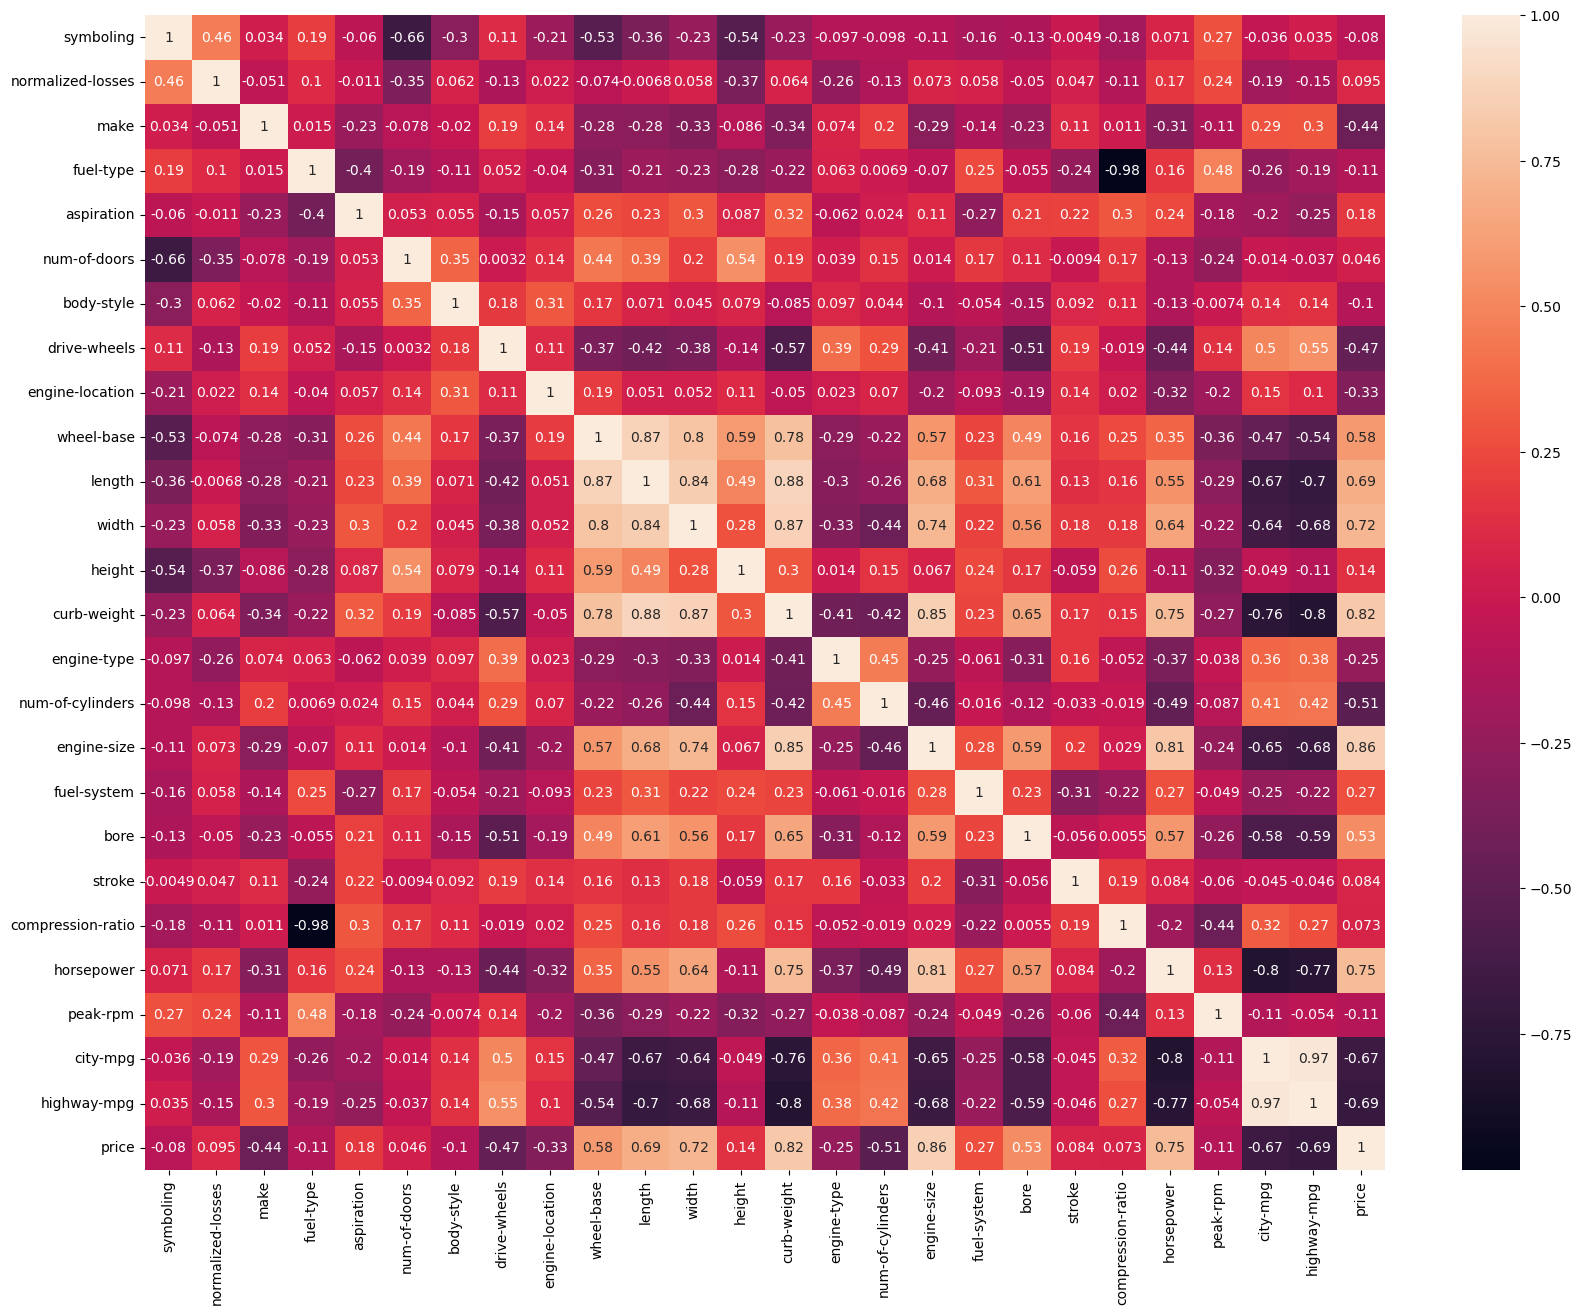

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [79]:
y_pred=linear_reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred)

In [80]:
mse

7271822.193650704

In [81]:
rmse=np.sqrt(mse)

In [82]:
rmse

2696.631638479884

In [83]:
r2_value=r2_score(y_train,y_train)
r2_value

1.0